Se utilizara la libreria de Sklearn KNeighborsClassifier de aprendisaje supervisado para analizar conjuntos de datos provenientes de capturas de trafico de red infectada por el malware 2017-01-19-pseudoDarkleech-Rig-V-sends-Cerber (https://www.malware-traffic-analysis.net/2017/01/19/index2.html), el cual tiene un comportamiento que podria ser clasificado a simple vista por el ser humano.
Se utilizaron dos dataframes uno para test (se clasifico el malware como M y normal como N) y otro para entrenamiento (no esta clasificado).

Librerias utilizadas:
pandas
numpy
KNeighborsClassifier
LabelEncoder

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
import mglearn
from sklearn.decomposition import PCA

/home/zentraedi/.local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/zentraedi/.local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Obtenemos los datos del archivo csv con pandas y se crea una nueva columna

In [2]:
dataframe = pd.read_csv('trafico.csv', index_col = 'Time')

dataframe['Count'] = np.nan

dataframe

,No.,Src Port,Dst Port,Source,Destination,Protocol,Length,Type,Count
Time,,,,,,,,,
2017-01-19 18:09:44,1,49286.0,80.0,10.1.19.102,192.185.225.245,TCP,66,N,NaN
2017-01-19 18:09:44,2,80.0,49286.0,192.185.225.245,10.1.19.102,TCP,60,N,NaN
2017-01-19 18:09:44,3,49286.0,80.0,10.1.19.102,192.185.225.245,TCP,60,N,NaN
2017-01-19 18:09:44,4,49286.0,80.0,10.1.19.102,192.185.225.245,HTTP,540,N,NaN
2017-01-19 18:09:44,5,80.0,49286.0,192.185.225.245,10.1.19.102,TCP,60,N,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-02 01:00:12,1496,52818.0,443.0,192.168.1.158,172.217.172.68,TCP,66,N,NaN
2019-12-02 01:00:12,1497,443.0,52818.0,172.217.172.68,192.168.1.158,TLSv1.3,1484,N,NaN
2019-12-02 01:00:12,1498,443.0,52818.0,172.217.172.68,192.168.1.158,TLSv1.3,1183,N,NaN


Se filtran los datos con groupby() que contengan los mismos valores y se guarda el conteo de los mismos
en la nueva columna.

In [3]:

df = dataframe.groupby(['Time', 'Src Port', 'Dst Port', 'Source', 'Protocol', 'Length', 'Type']).size().reset_index(name='counts')
dfc= df.copy()


Con la libreria LabelEncoder() codificamos nuestros datos creando relaciones entre los mismos
devolviendonos una tabla de numeros donde cada numero identifica a un dato unico en la tabla
permitiendonos utilizar los algoritmos de Machine Learning sin tener problemas de formato y 
que pueda entenderlos.
Tambien con el objeto MinMaxScaler escalamos nuestros datos para poder visualizar el comportamiento

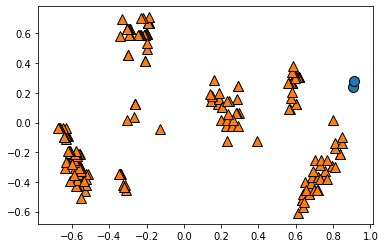

In [4]:
encoder = LabelEncoder()

dfc['Time'] = encoder.fit_transform(dfc['Time'])
dfc['Src Port'] = encoder.fit_transform(dfc['Src Port'])
dfc['Dst Port'] = encoder.fit_transform(dfc['Dst Port'])
dfc['Source'] = encoder.fit_transform(dfc['Source'])
dfc['Protocol'] = encoder.fit_transform(dfc['Protocol'])

x = dfc.iloc[:, [ 0, 1, 2, 3, 4, 5, 7]]
y = dfc.iloc[:, -2]


# datos que son consecutivos
esc = dfc.iloc[:, [ 0, 1, 2, 3, 4, 5, 7]]
escala = MinMaxScaler()
escala.fit(esc)
escalada = escala.transform(esc)
pca=PCA(n_components=2)
pca.fit(escalada)
transformada=pca.transform(escalada)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1], dfc['Type'])


Creamos un objeto de la clase KNeighborsClassifier() con una cantidad de vecinos en 2

In [5]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Scrore de acierto, con 2 llega a 100%, hasta ahora con las pruebas que realice no demuestra un sobre ajuste

In [6]:
knn.score(x, y)

1.0

Se probo con un dato aleatorio de la tabla codificada y nos devuelve su clasificacion
pasando los datos de la fila 366 el cual fue clasificado como malware manualmente

In [7]:
knn.predict([[21, 15, 2, 5, 4, 306, 1]])

array(['N'], dtype=object)

Se cargan los datos para la prueba

In [8]:
dataframe2 = pd.read_csv('trafico_prueba_2016.csv', index_col = 'Time')

dataframe2['Count'] = np.nan

dataframe2

,Src Port,Dst Port,Source,Destination,Protocol,Length,Count
Time,,,,,,,
2016-12-21 20:57:50,49276,80,10.12.21.103,46.4.75.100,TCP,66,NaN
2016-12-21 20:57:50,80,49276,46.4.75.100,10.12.21.103,TCP,60,NaN
2016-12-21 20:57:50,49276,80,10.12.21.103,46.4.75.100,TCP,60,NaN
2016-12-21 20:57:50,49276,80,10.12.21.103,46.4.75.100,HTTP,299,NaN
2016-12-21 20:57:50,80,49276,46.4.75.100,10.12.21.103,TCP,60,NaN
...,...,...,...,...,...,...,...
2016-12-21 21:09:31,49163,80,10.12.21.103,84.200.4.130,TCP,60,NaN
2016-12-21 21:10:36,80,49163,84.200.4.130,10.12.21.103,TCP,60,NaN
2016-12-21 21:10:36,49163,80,10.12.21.103,84.200.4.130,TCP,60,NaN


Se reagrupan los datos como en el test y se guarda una copia del dataframe para la prediccion

In [9]:
df2 = dataframe2.groupby(['Time', 'Src Port', 'Dst Port', 'Source', 'Protocol', 'Length']).size().reset_index(name='counts')
dfpredict = df2.copy()
df2[-40:]

,Time,Src Port,Dst Port,Source,Protocol,Length,counts
36,2016-12-21 20:57:55,80,49315,195.133.201.36,TCP,1514,6
37,2016-12-21 20:57:55,49315,80,10.12.21.103,TCP,60,6
38,2016-12-21 20:57:57,49317,80,10.12.21.103,TCP,66,1
39,2016-12-21 20:57:58,80,49317,195.133.201.36,TCP,60,2
40,2016-12-21 20:57:58,49317,80,10.12.21.103,HTTP,521,1
41,2016-12-21 20:57:58,49317,80,10.12.21.103,TCP,60,1
42,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,92,1
43,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,919,1
44,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,1157,1
45,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,1276,13


Codificacion de los datos con el mismo objeto LabelEncoder(), tambien creamos una escala para analizar el comportamiento graficamente

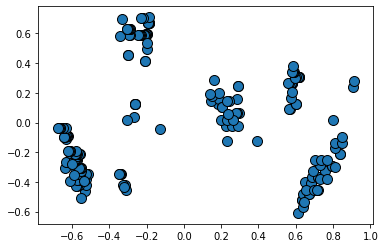

In [11]:
dfpredict['Time'] = encoder.fit_transform(dfpredict['Time'])
dfpredict['Src Port'] = encoder.fit_transform(dfpredict['Src Port'])
dfpredict['Dst Port'] = encoder.fit_transform(dfpredict['Dst Port'])
dfpredict['Source'] = encoder.fit_transform(df2['Source'])
dfpredict['Protocol'] = encoder.fit_transform(dfpredict['Protocol'])

x2 = dfpredict

esc2 = dfpredict
escala2 = MinMaxScaler()
escala2.fit(esc2)
escalada2 = escala.transform(esc2)
pca2=PCA(n_components=2)
pca2.fit(escalada2)
transformada2=pca2.transform(escalada2)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1])

Creamos una variable que gardara el array con la prediccion y guarda esos datos en una columna del dataframe

In [12]:
knnpred = knn.predict(x2)

df2['Prediction'] = knnpred
df2[-50:]



,Time,Src Port,Dst Port,Source,Protocol,Length,counts,Prediction
26,2016-12-21 20:57:54,80,49315,195.133.201.36,TCP,60,2,N
27,2016-12-21 20:57:54,49302,80,10.12.21.103,TCP,60,19,N
28,2016-12-21 20:57:54,49315,80,10.12.21.103,HTTP,698,1,N
29,2016-12-21 20:57:54,49315,80,10.12.21.103,TCP,60,1,N
30,2016-12-21 20:57:54,49315,80,10.12.21.103,TCP,66,1,N
31,2016-12-21 20:57:55,80,49315,195.133.201.36,HTTP,901,1,N
32,2016-12-21 20:57:55,80,49315,195.133.201.36,TCP,1038,1,N
33,2016-12-21 20:57:55,80,49315,195.133.201.36,TCP,1157,1,N
34,2016-12-21 20:57:55,80,49315,195.133.201.36,TCP,1276,1,N
35,2016-12-21 20:57:55,80,49315,195.133.201.36,TCP,1395,1,N
